<a href="https://colab.research.google.com/github/dffasyhrndy/Praktikum-AVD/blob/main/Visualisasi%20dan%20Insight/Praktikum-AVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Gathering & Business Understanding**

## **Business Understanding**

### **Business Objective**

Tujuan utama proyek ini adalah untuk menganalisis data performa siswa guna mengidentifikasi faktor-faktor kunci yang mempengaruhi keberhasilan akademik. Dengan memahami pengaruh variabel seperti nilai ujian, kehadiran, partisipasi dalam kegiatan ekstrakurikuler, dan latar belakang demografis, diharapkan lembaga pendidikan dapat mengembangkan strategi intervensi yang tepat untuk meningkatkan prestasi siswa dan mendukung keberhasilan belajar secara menyeluruh

### **Assess Situation**

Lingkungan pendidikan saat ini menghadapi berbagai tantangan, mulai dari perbedaan latar belakang siswa hingga metode pengajaran yang bervariasi. Data yang telah dikumpulkan mencakup:

- Nilai Akademik: Termasuk nilai ujian, tugas, dan proyek.
- Kehadiran: Frekuensi kehadiran siswa di kelas.
- Aktivitas Ekstrakurikuler: Keterlibatan siswa dalam kegiatan di luar kurikulum.
- Profil Demografis: Informasi seperti usia, jenis kelamin, dan latar belakang sosial ekonomi.

Analisis mendalam dari data ini akan membantu mengungkap tren dan pola yang berkontribusi pada kesuksesan atau tantangan dalam proses belajar mengajar, sehingga pihak sekolah dapat membuat kebijakan yang lebih adaptif dan berbasis data.

### **Data Mining Goals**

1. Segmentasi Siswa:
Mengelompokkan siswa berdasarkan performa, tingkat kehadiran, dan partisipasi aktivitas, sehingga strategi pembelajaran yang lebih personal dapat dikembangkan untuk tiap kelompok.

2. Prediksi Performa Akademik:
Mengembangkan model prediksi untuk mengantisipasi penurunan atau peningkatan prestasi siswa, sehingga intervensi dini dapat dilakukan secara tepat waktu.

3. Identifikasi Faktor Kunci:
Menemukan variabel mana yang memiliki pengaruh paling signifikan terhadap performa akademik, seperti korelasi antara kehadiran dengan nilai atau dampak partisipasi ekstrakurikuler terhadap prestasi.

4. Rekomendasi Intervensi:
Menghasilkan rekomendasi berbasis data untuk pihak sekolah guna meningkatkan metode pembelajaran dan dukungan akademik, termasuk program pendampingan bagi siswa yang berisiko mengalami penurunan performa.

### **Project Plan**

1. Pengumpulan Data:
- Mengumpulkan data nilai ujian, tugas, dan proyek dari sistem informasi sekolah.
- Merekam data kehadiran, partisipasi ekstrakurikuler, dan informasi demografis siswa.
- Menjamin kualitas data dengan memastikan keakuratan dan kelengkapan data yang diambil.

2. Pembersihan & Pemrosesan Data:
- Menghapus duplikasi, menangani nilai yang hilang, dan mengkonsolidasikan data dari berbagai sumber.
- Normalisasi data agar siap dianalisis, misalnya dengan mengubah nilai ke dalam skala yang konsisten.


## **Data Understanding**

### **Pengecekan Struktur Data dan Tipe Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/student_performance_large_dataset.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

### **Jumlah Kolom dan Baris**

In [ ]:
print(df.shape)

(10000, 15)


### **Statistik Deskriptif**

In [ ]:
df.describe()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


### **Analisis Korelasi**

In [ ]:
df.corr(numeric_only=True)

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
Age,1.000000,-0.002108,-0.004895,-0.006275,0.001693,-0.014050,0.012660,0.012052
Study_Hours_per_Week,-0.002108,1.000000,0.025951,0.000894,0.004084,0.007768,0.010380,0.010908
Online_Courses_Completed,-0.004895,0.025951,1.000000,-0.000654,0.002070,0.001067,0.002619,-0.008139
Assignment_Completion_Rate (%),-0.006275,0.000894,-0.000654,1.000000,0.010470,0.000026,0.007933,0.009544
Exam_Score (%),0.001693,0.004084,0.002070,0.010470,1.000000,0.003717,0.000818,-0.016284
Attendance_Rate (%),-0.014050,0.007768,0.001067,0.000026,0.003717,1.000000,-0.013386,-0.005105
Time_Spent_on_Social_Media (hours/week),0.012660,0.010380,0.002619,0.007933,0.000818,-0.013386,1.000000,-0.001699
Sleep_Hours_per_Night,0.012052,0.010908,-0.008139,0.009544,-0.016284,-0.005105,-0.001699,1.000000


## **Data Preparation**

In [ ]:
df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


###  **Missing Values**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

print("Tidak ditemukan nilai yang hilang dalam dataset.")

Student_ID                                 0.0
Age                                        0.0
Gender                                     0.0
Study_Hours_per_Week                       0.0
Preferred_Learning_Style                   0.0
Online_Courses_Completed                   0.0
Participation_in_Discussions               0.0
Assignment_Completion_Rate (%)             0.0
Exam_Score (%)                             0.0
Attendance_Rate (%)                        0.0
Use_of_Educational_Tech                    0.0
Self_Reported_Stress_Level                 0.0
Time_Spent_on_Social_Media (hours/week)    0.0
Sleep_Hours_per_Night                      0.0
Final_Grade                                0.0
dtype: float64
Tidak ditemukan nilai yang hilang dalam dataset.


### **Duplicated Values**

In [ ]:
df[df.duplicated()]
print("Tidak ditemukan nilai duplikat dalam dataset.")

Tidak ditemukan nilai duplikat dalam dataset.


### **Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)
print("Tidak ada data yang dianggap sebagai outlier.")

Kolom,Persentase Outliers
Age,0.0
Study_Hours_per_Week,0.0
Online_Courses_Completed,0.0
Assignment_Completion_Rate (%),0.0
Exam_Score (%),0.0
Attendance_Rate (%),0.0
Time_Spent_on_Social_Media (hours/week),0.0
Sleep_Hours_per_Night,0.0


Tidak ada data yang dianggap sebagai outlier.


### **Incosistent Values**

In [ ]:
inconsistent_values = {
    "Age": df[(df["Age"] < 18) | (df["Age"] > 30)].shape[0],
    "Study_Hours_per_Week": df[(df["Study_Hours_per_Week"] < 0) | (df["Study_Hours_per_Week"] > 60)].shape[0],
    "Exam_Score (%)": df[(df["Exam_Score (%)"] < 0) | (df["Exam_Score (%)"] > 100)].shape[0],
    "Attendance_Rate (%)": df[(df["Attendance_Rate (%)"] < 0) | (df["Attendance_Rate (%)"] > 100)].shape[0],
    "Sleep_Hours_per_Night": df[(df["Sleep_Hours_per_Night"] < 0) | (df["Sleep_Hours_per_Night"] > 12)].shape[0],
}

print("Jumlah nilai tidak konsisten:")
print(inconsistent_values)
print("Tidak ada nilai yang dianggap sebagai nilai tidak konsisten.")

Jumlah nilai tidak konsisten:
{'Age': 0, 'Study_Hours_per_Week': 0, 'Exam_Score (%)': 0, 'Attendance_Rate (%)': 0, 'Sleep_Hours_per_Night': 0}
Tidak ada nilai yang dianggap sebagai nilai tidak konsisten.


Setelah dilakukan pengecekan terhadap data untuk menemukan nilai yang hilang, duplikat, outliers, dan nilai yang tidak konsisten, ternyata tidak ditemukan satupun, maka tidak ada penanganan atau perbaikan data.

### **Construct Data/Penambahan Data**

In [ ]:
df["Study_Efficiency"] = df["Exam_Score (%)"] / df["Study_Hours_per_Week"].replace(0, 1) #Menambahkan Kolom Studi Efisiensi

df["Sleep_Quality"] = df["Sleep_Hours_per_Night"] * df["Attendance_Rate (%)"] / 100 #Menambahkan Kolom Kualitas Tidur

df["Social_Impact"] = df["Attendance_Rate (%)"] - df["Time_Spent_on_Social_Media (hours/week)"] #Menambahkan Kolom Dampak Sosial

df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Study_Efficiency,Sleep_Quality,Social_Impact
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C,1.437500,5.28,57
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D,1.333333,4.56,29
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D,0.914894,5.53,66
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B,5.384615,6.00,36
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C,2.625000,7.44,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C,1.933333,4.56,59
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B,5.250000,4.30,80
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D,1.739130,5.60,50
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D,1.097561,7.20,84


### **Data Reduction/Reduksi Data**

In [ ]:
drop_columns = ["Student_ID", "Preferred_Learning_Style", "Use_of_Educational_Tech"] #ID Pelajar,Gaya Belajar yang Disukai", "Penggunaan Teknologi Pendidikan"
df.drop(columns=drop_columns, inplace=True)

print("Data setelah data preparation:")
df


Data setelah data preparation:


,Age,Gender,Study_Hours_per_Week,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Study_Efficiency,Sleep_Quality,Social_Impact
0,18,Female,48,14,Yes,100,69,66,High,9,8,C,1.437500,5.28,57
1,29,Female,30,20,No,71,40,57,Medium,28,8,D,1.333333,4.56,29
2,20,Female,47,11,No,60,43,79,Low,13,7,D,0.914894,5.53,66
3,23,Female,13,0,Yes,63,70,60,Low,24,10,B,5.384615,6.00,36
4,19,Female,24,19,Yes,59,63,93,Medium,26,8,C,2.625000,7.44,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20,Male,30,6,Yes,62,58,76,Medium,17,6,C,1.933333,4.56,59
9996,23,Female,16,8,Yes,54,84,86,Medium,6,5,B,5.250000,4.30,80
9997,26,Male,23,3,Yes,54,40,70,Medium,20,8,D,1.739130,5.60,50
9998,18,Male,41,7,Yes,66,45,90,Low,6,8,D,1.097561,7.20,84


## **Visualisasi data Dan Insight**

### **Distribusi Nilai Ujian**

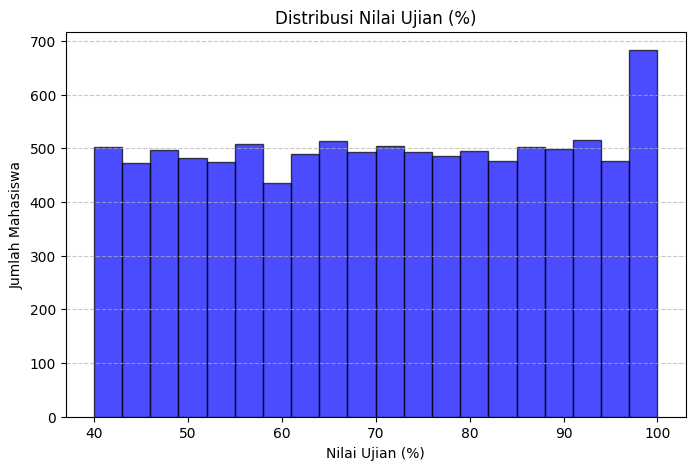

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df["Exam_Score (%)"], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribusi Nilai Ujian (%)")
plt.xlabel("Nilai Ujian (%)")
plt.ylabel("Jumlah Mahasiswa")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight : Nilai ujian sebagian besar berkisar antara 60%–80%, namun terdapat juga beberapa nilai yang sangat rendah (mendekati 40%) dan beberapa yang sangat tinggi (mendekati 100%).

Tindakan: Menyelenggarakan program peningkatan mutu belajar agar mahasiswa yang sudah berada di rentang moderat dapat terdorong ke nilai yang lebih tinggi.

### **Jam Belajar Mingguan vs Nilai Ujian (%)**

<ipython-input-16-7a4f977c1c6a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_study = df.groupby("Study_Hours_Bin")["Exam_Score (%)"].apply(list)
<ipython-input-16-7a4f977c1c6a>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_study, labels=[f"{interval}" for interval in grouped_study.index])


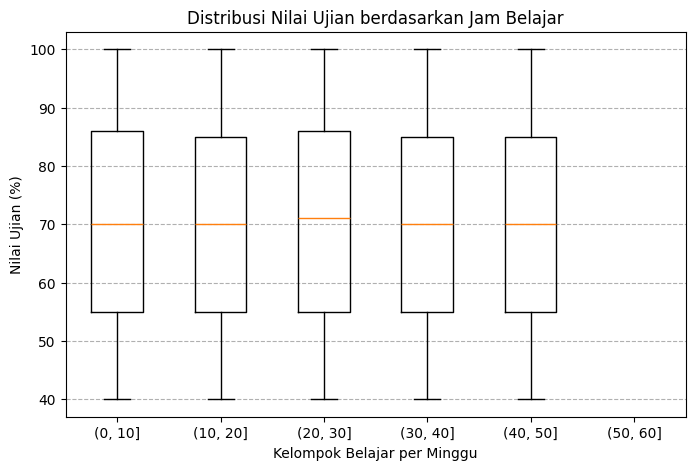

In [16]:
bins = [0, 10, 20, 30, 40, 50, 60]
df['Study_Hours_Bin'] = pd.cut(df["Study_Hours_per_Week"], bins=bins)
# Mengelompokkan nilai Exam_Score berdasarkan bin
grouped_study = df.groupby("Study_Hours_Bin")["Exam_Score (%)"].apply(list)

plt.figure(figsize=(8, 5))
plt.boxplot(grouped_study, labels=[f"{interval}" for interval in grouped_study.index])
plt.title("Distribusi Nilai Ujian berdasarkan Jam Belajar")
plt.xlabel("Kelompok Belajar per Minggu")
plt.ylabel("Nilai Ujian (%)")
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

Insight: Perbedaan jam belajar menunjukkan bahwa peningkatan jam belajar tidak selalu berbanding lurus dengan peningkatan nilai ujian, mengindikasikan bahwa kualitas belajar juga sangat penting.

Tindakan: Mendorong mahasiswa untuk mengadopsi strategi belajar yang lebih efisien daripada sekadar meningkatkan kuantitas waktu belajar.


### **Tingkat Kehadiran vs Nilai Ujian (%)**

<ipython-input-12-5d53e506af53>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_mean = df.groupby("Attendance_Bin")["Exam_Score (%)"].mean()


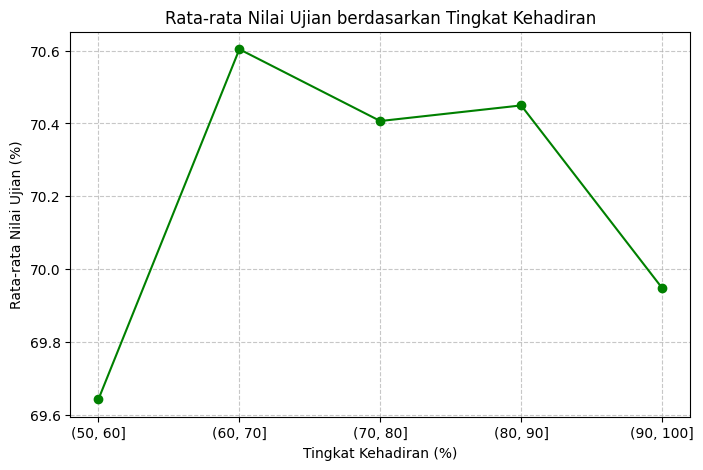

In [12]:
bins_attendance = [50, 60, 70, 80, 90, 100]
df['Attendance_Bin'] = pd.cut(df["Attendance_Rate (%)"], bins=bins_attendance)
# Menghitung rata-rata nilai ujian per kelompok
attendance_mean = df.groupby("Attendance_Bin")["Exam_Score (%)"].mean()

plt.figure(figsize=(8, 5))
plt.plot([str(interval) for interval in attendance_mean.index], attendance_mean.values,
         marker='o', color='green', linestyle='-')
plt.title("Rata-rata Nilai Ujian berdasarkan Tingkat Kehadiran")
plt.xlabel("Tingkat Kehadiran (%)")
plt.ylabel("Rata-rata Nilai Ujian (%)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Insight: Rata-rata nilai ujian cenderung meningkat seiring dengan peningkatan tingkat kehadiran, meskipun tren ini tidak sangat kuat.

Tindakan: Menyelidiki faktor-faktor yang membuat kehadiran tinggi berkontribusi pada nilai yang lebih baik, dan menerapkan strategi tersebut secara lebih luas.


### **Distribusi Nilai Akhir**

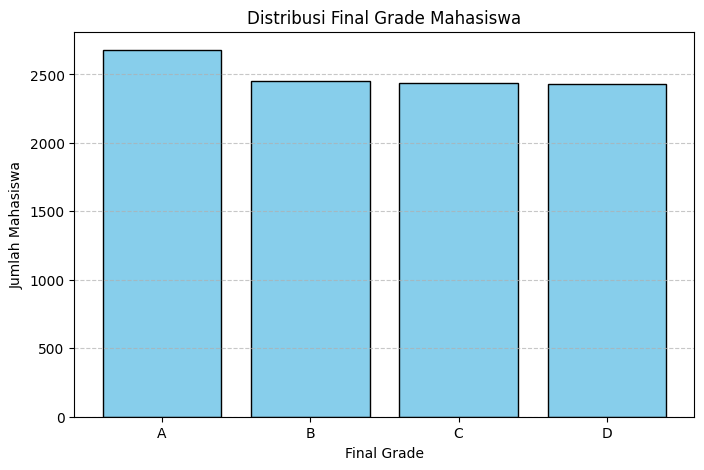

In [13]:
plt.figure(figsize=(8, 5))
grade_counts = df["Final_Grade"].value_counts()
plt.bar(grade_counts.index, grade_counts.values, color='skyblue', edgecolor='black')
plt.title("Distribusi Final Grade Mahasiswa")
plt.xlabel("Final Grade")
plt.ylabel("Jumlah Mahasiswa")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight: Mayoritas mahasiswa memperoleh nilai B atau C, yang menunjukkan adanya ruang untuk perbaikan kinerja akademik secara keseluruhan.

Tindakan: Mengimplementasikan program peningkatan atau remedial bagi mahasiswa yang mendapatkan nilai di bawah standar agar dapat naik ke nilai yang lebih baik.

## **Korelasi antar Numerik**

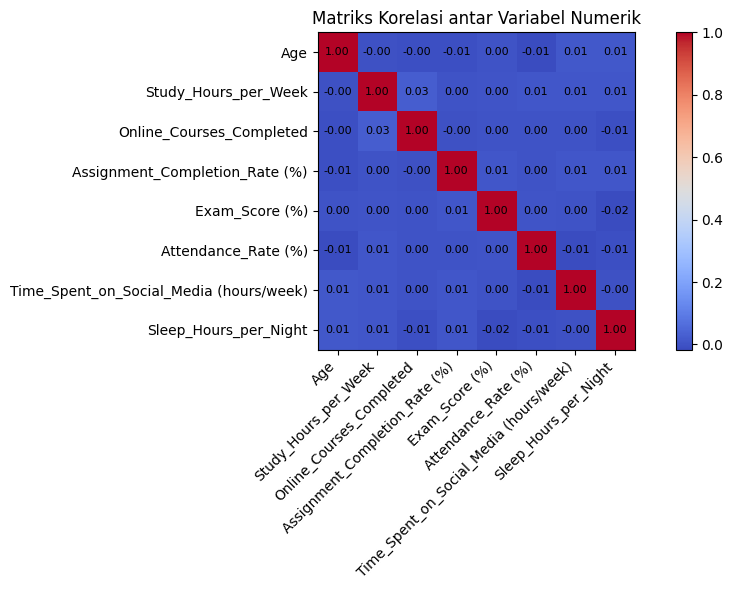

In [14]:
plt.figure(figsize=(10, 6))
numerical_cols = ["Age", "Study_Hours_per_Week", "Online_Courses_Completed",
                  "Assignment_Completion_Rate (%)", "Exam_Score (%)",
                  "Attendance_Rate (%)", "Time_Spent_on_Social_Media (hours/week)",
                  "Sleep_Hours_per_Night"]
corr_matrix = df[numerical_cols].corr()
im = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(im)
plt.title("Matriks Korelasi antar Variabel Numerik")
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=45, ha='right')
plt.yticks(range(len(numerical_cols)), numerical_cols)
# Menambahkan anotasi nilai korelasi di setiap sel
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center",
                 color="black", fontsize=8)
plt.tight_layout()
plt.show()

Insight: Hubungan antar variabel numerik seperti jam belajar, kehadiran, dan nilai ujian relatif lemah. Hal ini mengindikasikan bahwa kinerja akademik dipengaruhi oleh kombinasi faktor yang kompleks, bukan hanya satu faktor saja.

Tindakan: Mengadopsi pendekatan holistik dalam perbaikan kinerja akademik dengan memperhatikan berbagai aspek, seperti metode pengajaran, dukungan psikologis, dan teknik belajar.

### **Nilai Ujian Berdasarkan Jam Tidur**

<ipython-input-15-29415b8c720a>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_sleep, labels=grouped_sleep.index)


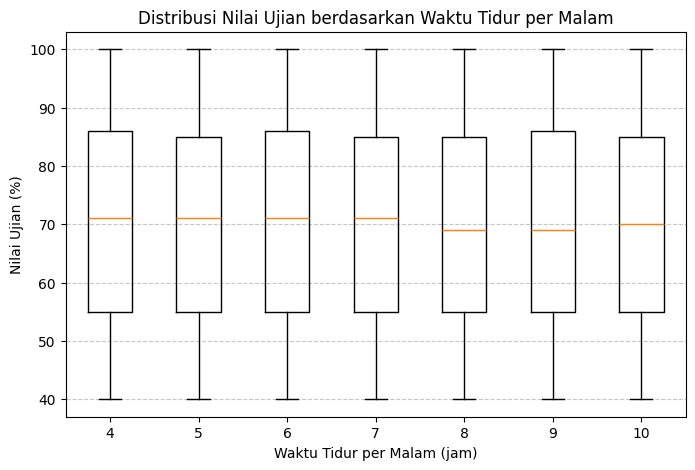

In [15]:
grouped_sleep = df.groupby("Sleep_Hours_per_Night")["Exam_Score (%)"].apply(list)

plt.figure(figsize=(8, 5))
plt.boxplot(grouped_sleep, labels=grouped_sleep.index)
plt.title("Distribusi Nilai Ujian berdasarkan Waktu Tidur per Malam")
plt.xlabel("Waktu Tidur per Malam (jam)")
plt.ylabel("Nilai Ujian (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insight:  Distribusi nilai ujian berdasarkan jam tidur per malam tidak menunjukkan perbedaan yang signifikan, yang berarti variabel ini mungkin bukan faktor utama dalam menentukan nilai ujian.

TIndakan: Mengintegrasikan edukasi tentang pentingnya kualitas tidur sebagai bagian dari program kesehatan dan kebugaran bagi mahasiswa.